# LagbaOmer PM2.5 airpollution Projcet

import data

In [47]:
import pandas as pd
df_2025 = pd.read_excel("../data/Holiday_Eve/2025_HolidayEve.xlsx")
df_2024 = pd.read_excel("../data/Holiday_Eve/2024_HolidayEve.xlsx")
df_2023= pd.read_excel("../data/Holiday_Eve/2023_HolidayEve.xlsx")
df_2022 = pd.read_excel("../data/Holiday_Eve/2022_HolidayEve.xlsx")
df_2021 = pd.read_excel("../data/Holiday_Eve/2021_HolidayEve.xlsx")

## 2025

Handling 2025 data

In [91]:
df_2025.head(2)

,תאריך ושעה,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","בני ברק, כביש 4","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אשקלון, שמשון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","קטורה, קטורה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","נתניה, קריית השרון","רעננה, רחוב אחוזה","קריית אתא, ניידת 4"
0,18:00 15/05/2025,9.1,-0.1,5.6,2.5,17.1,14,3.99,7.31,18,7.15,4.3,8.19,2.6,7.18,7.7,14.7,1.8
1,19:00 15/05/2025,8.5,4.2,5.2,5.6,2.8,15.1,2.88,10.48,14.8,7.31,4.3,8.05,0,6.88,9.2,8.1,9.9


Removing stations that are not relevant to the sample

In [49]:
df_2025
# Step 1: Rename row index 17 to 'Max_PM2.5'
df_2025 = df_2025.copy()
df_2025.index = df_2025.index.astype(str)
df_2025.index = df_2025.index.where(df_2025.index != '17', 'Max_PM2.5')

# Step 2: Keep only the row named 'Max_PM2.5'
df_max = df_2025.loc[["Max_PM2.5"]]

# Display the result
df_max = df_max.drop(columns=["תאריך ושעה"])
df_max = df_max.drop(columns=["רעננה, רחוב אחוזה","בני ברק, כביש 4","אשקלון, שמשון","נתניה, קריית השרון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","קטורה, קטורה"])
# df_max = df_max.drop(columns=["מועצה אזורית חוף הכרמל, כפר הנוער שפיה","קטורה, קטורה"])
df_max_2025= df_max
df_max_2025


,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","קריית אתא, ניידת 4"
Max_PM2.5,61.8,74.6,13.2,17.1,23.7,62.5,81.52,77.28,12,42.48,14.8


Convert DF values ​​to a list

In [50]:
pm25_list = df_max.iloc[0].tolist()
pm25_list


[61.8, 74.6, 13.2, 17.1, 23.7, 62.5, 81.52, 77.28, 12, 42.48, 14.8]

Normality test using the Shapiro-Wilk test

In [51]:
from scipy.stats import shapiro

stat, p = shapiro(pm25_list)
print(f"Shapiro-Wilk test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data looks normal")
else:
    print("Data does NOT look normal")

Shapiro-Wilk test: stat=0.850, p=0.043
Data does NOT look normal


Normality testing using a visual QQ diagram

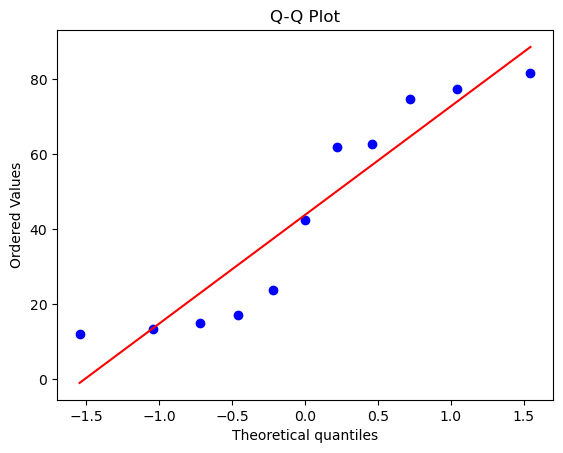

In [52]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(pm25_list, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

## 2024

Handling 2024 data

In [93]:
df_2024.head(2)

,תאריך ושעה,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","בני ברק, כביש 4","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אשקלון, שמשון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","קטורה, קטורה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","נתניה, קריית השרון","רעננה, רחוב אחוזה","קריית אתא, ניידת 4"
0,18:00 25/05/2024,13.3,11.1,19.5,11.8,10.2,9.2,8.12,10.13,18.7,9.65,13.5,16.07,11.5,10.34,12.6,NoData,21.3
1,19:00 25/05/2024,15.6,10.3,11.2,10,18.6,39,9.36,11.74,17.3,9.8,14.8,18,9.2,10.77,15.4,25.8,12


Removing stations that are not relevant to the sample

In [54]:
df_2024
# Step 1: Rename row index 17 to 'Max_PM2.5'
df_2024 = df_2024.copy()
df_2024.index = df_2024.index.astype(str)
df_2024.index = df_2024.index.where(df_2024.index != '17', 'Max_PM2.5')

# Step 2: Keep only the row named 'Max_PM2.5'
df_max = df_2024.loc[["Max_PM2.5"]]

# Display the result
df_max = df_max.drop(columns=["תאריך ושעה"])
df_max = df_max.drop(columns=["רעננה, רחוב אחוזה","בני ברק, כביש 4","אשקלון, שמשון","נתניה, קריית השרון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","קטורה, קטורה"])
df_max_2024= df_max
df_max_2024

,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","קריית אתא, ניידת 4"
Max_PM2.5,31.5,132.6,16.8,19.7,39,57.7,28.61,56.76,26.6,101.94,22.8


Convert DF values ​​to a list

In [55]:
pm24_list = df_max.iloc[0].tolist()
pm24_list

[31.5, 132.6, 16.8, 19.7, 39, 57.7, 28.61, 56.76, 26.6, 101.94, 22.8]

Normality test using the Shapiro-Wilk test

In [56]:
from scipy.stats import shapiro

stat, p = shapiro(pm24_list)
print(f"Shapiro-Wilk test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data looks normal")
else:
    print("Data does NOT look normal")

Shapiro-Wilk test: stat=0.798, p=0.009
Data does NOT look normal


Normality testing using a visual QQ diagram

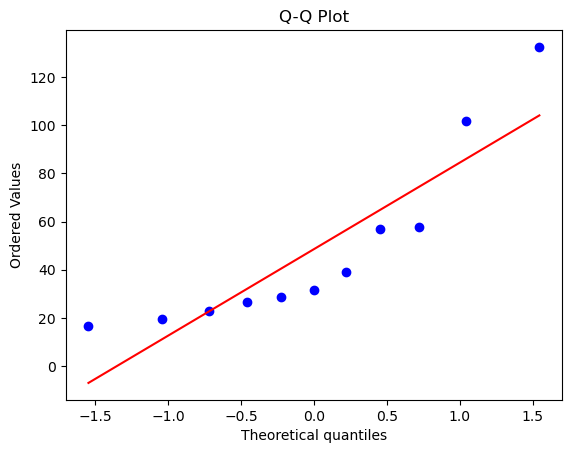

In [57]:
stats.probplot(pm24_list, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

## 2023


Handling 2023 data

In [58]:
df_2023.head(2)

,תאריך ושעה,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","בני ברק, כביש 4","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אשקלון, שמשון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","קטורה, קטורה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","נתניה, קריית השרון","רעננה, רחוב אחוזה","קריית אתא, ניידת 4"
0,18:00 08/05/2023,13.9,20,22,26.9,-4.8,16,10.51,16.52,23,11.81,15.5,17.1,11.7,10.79,13,15.1,12.3
1,19:00 08/05/2023,14.7,12,19.3,38.7,-0.3,23.3,17.86,15.45,21,14.2,17.6,20.13,13.1,12.95,28,20.7,13.9


Removing stations that are not relevant to the sample

In [59]:
df_2023
# Step 1: Rename row index 17 to 'Max_PM2.5'
df_2023 = df_2023.copy()
df_2023.index = df_2023.index.astype(str)
df_2023.index = df_2023.index.where(df_2023.index != '17', 'Max_PM2.5')

# Step 2: Keep only the row named 'Max_PM2.5'
df_max = df_2023.loc[["Max_PM2.5"]]

# Display the result
df_max = df_max.drop(columns=["תאריך ושעה"])
df_max = df_max.drop(columns=["רעננה, רחוב אחוזה","בני ברק, כביש 4","אשקלון, שמשון","נתניה, קריית השרון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","קטורה, קטורה"])
df_max_2023= df_max
df_max_2023

,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","קריית אתא, ניידת 4"
Max_PM2.5,62.9,132.6,134.4,18.3,35.4,85.3,62.79,57.6,31.2,66.52,39.5


Convert DF values ​​to a list

In [60]:

pm23_list = df_max.iloc[0].tolist()
pm23_list 

[62.9, 132.6, 134.4, 18.3, 35.4, 85.3, 62.79, 57.6, 31.2, 66.52, 39.5]

Normality testing using a visual QQ diagram

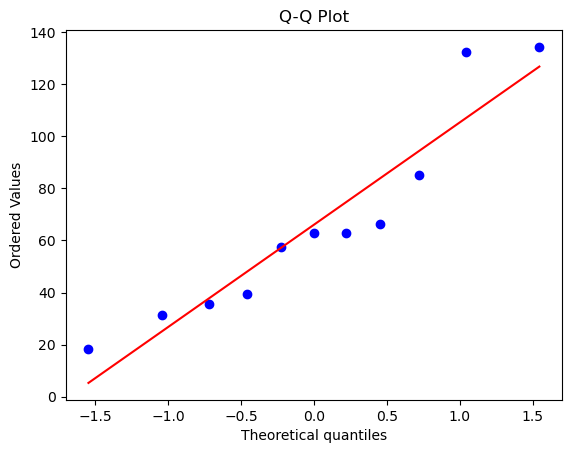

In [61]:
stats.probplot(pm23_list, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Convert DF values ​​to a list

In [62]:
from scipy.stats import shapiro

stat, p = shapiro(pm23_list)
print(f"Shapiro-Wilk test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data looks normal")
else:
    print("Data does NOT look normal")

Shapiro-Wilk test: stat=0.886, p=0.125
Data looks normal


## 2022

Handling 2022 data

In [63]:
df_2022.head(2)

,תאריך ושעה,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","בני ברק, כביש 4","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אשקלון, שמשון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","קטורה, קטורה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","נתניה, קריית השרון","רעננה, רחוב אחוזה","קריית אתא, ניידת 4"
0,18:00 18/05/2022,15.3,25.5,14.4,29.2,13.4,17.5,0.03,12.44,19,12.48,14,22.77,12,16.92,17.8,24.2,19.7
1,19:00 18/05/2022,17.2,15.4,30,27.2,13.7,21.7,0.03,17.08,26,21.85,14,16,8.7,15.94,11.2,19.7,23.6


Removing stations that are not relevant to the sample

In [64]:
df_2022
# Step 1: Rename row index 17 to 'Max_PM2.5'
df_2022 = df_2022.copy()
df_2022.index = df_2022.index.astype(str)
df_2022.index = df_2022.index.where(df_2022.index != '17', 'Max_PM2.5')

# Step 2: Keep only the row named 'Max_PM2.5'
df_max = df_2022.loc[["Max_PM2.5"]]

# Display the result
df_max = df_max.drop(columns=["תאריך ושעה"])
df_max = df_max.drop(columns=["רעננה, רחוב אחוזה","בני ברק, כביש 4","אשקלון, שמשון","נתניה, קריית השרון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","קטורה, קטורה"])
df_max_2022= df_max
df_max_2022

,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","קריית אתא, ניידת 4"
Max_PM2.5,48.8,211.5,29.2,25.8,54,115,137.11,43.9,26.9,52.14,33.3


Handling 2025 data

In [65]:
pm22_list = df_max.iloc[0].tolist()
pm22_list 


[48.8, 211.5, 29.2, 25.8, 54, 115, 137.11, 43.9, 26.9, 52.14, 33.3]

Normality testing using a visual QQ diagram

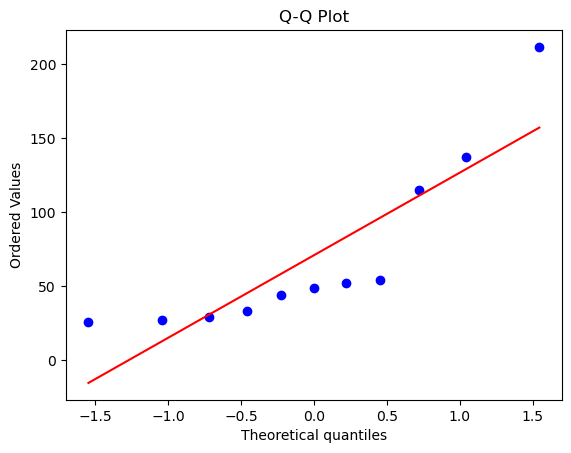

In [66]:
stats.probplot(pm22_list, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


Normality test using the Shapiro-Wilk test

In [67]:
from scipy.stats import shapiro

stat, p = shapiro(pm22_list)
print(f"Shapiro-Wilk test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data looks normal")
else:
    print("Data does NOT look normal")

Shapiro-Wilk test: stat=0.762, p=0.003
Data does NOT look normal


## 2021

Handling 2021 data

In [68]:
df_2021
# Step 1: Rename row index 17 to 'Max_PM2.5'
df_2021 = df_2021.copy()
df_2021.index = df_2021.index.astype(str)
df_2021.index = df_2021.index.where(df_2021.index != '17', 'Max_PM2.5')

# Step 2: Keep only the row named 'Max_PM2.5'
df_max = df_2021.loc[["Max_PM2.5"]]

# Display the result
df_max = df_max.drop(columns=["תאריך ושעה"])
df_max = df_max.drop(columns=["רעננה, רחוב אחוזה","בני ברק, כביש 4","אשקלון, שמשון","נתניה, קריית השרון","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","קטורה, קטורה"])
df_max_2021 = df_max 
df_max


,"תל אביב-יפו, רחוב לחי","ירושלים, רחוב בר אילן","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","חדרה, חפציבה","חריש, חריש","קריית מלאכי, קריית מלאכי","קריית אתא, ניידת 4"
Max_PM2.5,109.3,86,37,38.5,74,158.3,66.3,55.56,50.6,124.08,51.6


Convert DF values ​​to a list

In [69]:
pm21_list = df_max.iloc[0].tolist()
pm21_list 

[109.3, 86, 37, 38.5, 74, 158.3, 66.3, 55.56, 50.6, 124.08, 51.6]

Normality testing using a visual QQ diagram

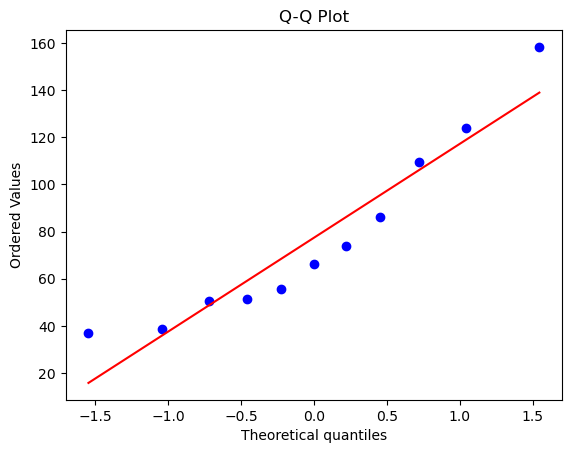

In [70]:
stats.probplot(pm21_list, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


Normality test using the Shapiro-Wilk test

In [71]:
from scipy.stats import shapiro

stat, p = shapiro(pm21_list)
print(f"Shapiro-Wilk test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data looks normal")
else:
    print("Data does NOT look normal")

Shapiro-Wilk test: stat=0.896, p=0.167
Data looks normal


## Hypothesis tests

 friedmanChiSquare (25 vs 24 vs 23 vs 22 vs 21)

In [72]:
from scipy.stats import friedmanchisquare
import pandas as pd
statistic, p_value = friedmanchisquare(pm25_list,pm24_list,pm23_list,pm22_list,pm21_list)

print("Friedman Test Statistic:", statistic)
print("p-value:", p_value)

# Result
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference of the pollution between years.")
else:
    print("Conclusion: There is no statistically significant difference of the pollution between years.")

Friedman Test Statistic: 14.26484018264839
p-value: 0.006496046370378631
Conclusion: There is a statistically significant difference of the pollution between years.


### compare 25 with 24

Wilcoxon- paired 2025 vs 2024

In [73]:
from scipy.stats import wilcoxon

# pm24_list
# pm25_list
stat, p = wilcoxon(pm25_list, pm24_list, alternative='less')  

print(f'stat={stat:.3f}, p={p:.3f}')
if p < 0.05:
    print("✅ Significant difference (2025 lower)")
else:
    print("! No significant difference")


stat=27.000, p=0.319
! No significant difference


Bootstrap 2025 vs 2024

Observed mean difference: 4.821
P-value (one-sided, pm24 > pm25): 0.3128


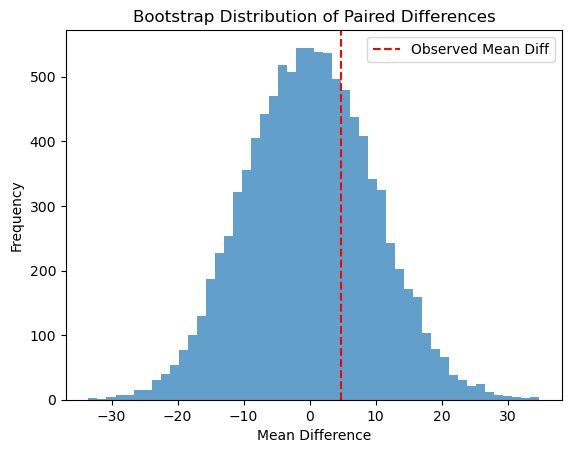

In [74]:
import numpy as np
import matplotlib.pyplot as plt

pm24 = np.array(pm24_list)
pm25 = np.array(pm25_list)

# Step 1: Calculate observed differences
differences = pm24 - pm25
obs_mean_diff = np.mean(differences)

# Step 2: Center the differences under the null hypothesis (mean=0)
centered_diff = differences - np.mean(differences)

# Step 3: Bootstrap
n_bootstraps = 10000
boot_means = []

for _ in range(n_bootstraps):
    sample = np.random.choice(centered_diff, size=len(centered_diff), replace=True)
    boot_means.append(np.mean(sample))

boot_means = np.array(boot_means)

# Step 4: Calculate p-value (right-tailed test)
p_value = np.mean(boot_means >= obs_mean_diff)

# Output results
print(f"Observed mean difference: {obs_mean_diff:.3f}")
print(f"P-value (one-sided, pm24 > pm25): {p_value:.4f}")

# Optional: Plot the bootstrap distribution
plt.hist(boot_means, bins=50, alpha=0.7)
plt.axvline(obs_mean_diff, color='red', linestyle='dashed', label='Observed Mean Diff')
plt.title('Bootstrap Distribution of Paired Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Bar graph comparing 2025 with 2024

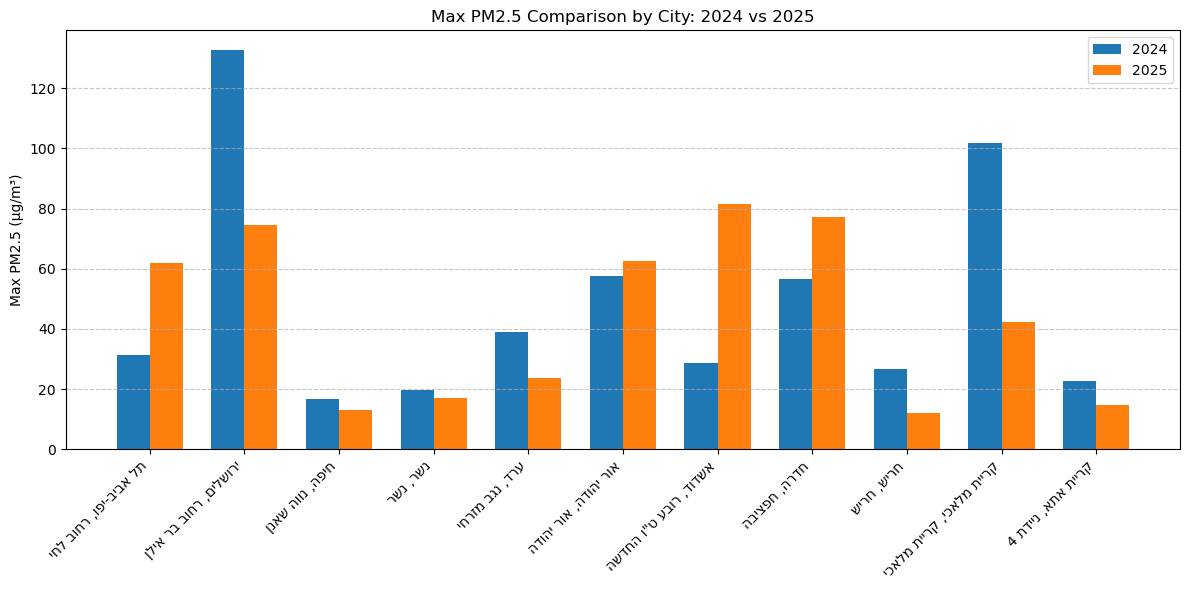

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert single-row DataFrames to Series
pm2024 = df_max_2024.iloc[0]
pm2025 = df_max_2025.iloc[0]

# Extract cities (column names)
cities = df_max_2024.columns.tolist()
cities_rtl = [city[::-1] for city in cities]  # Reverse Hebrew for display in LTR

# Set positions for bars
x = np.arange(len(cities))
width = 0.35

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, pm2024.values, width, label='2024')
plt.bar(x + width/2, pm2025.values, width, label='2025')

# Labeling
plt.xticks(x, cities_rtl, rotation=45, ha='right')
plt.ylabel('Max PM2.5 (µg/m³)')
plt.title('Max PM2.5 Comparison by City: 2024 vs 2025')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### compare 25 with 23

Wilcoxon 2025 vs 2023

In [76]:
import statsmodels.stats
from scipy import stats
# Step 4: Run the Wilcoxon signed-rank test
stat, p = stats.wilcoxon(pm25_list, pm23_list, alternative='less')

# Step 5: Print result
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('A significant decrease occurred in 2025, compared to 2023.')

stat=10.000, p=0.021
A significant decrease occurred in 2025, compared to 2023.


Bootstrap 2025 vs 2023

Observed mean difference: 22.321
P-value (one-sided, pm23 > pm25): 0.0347


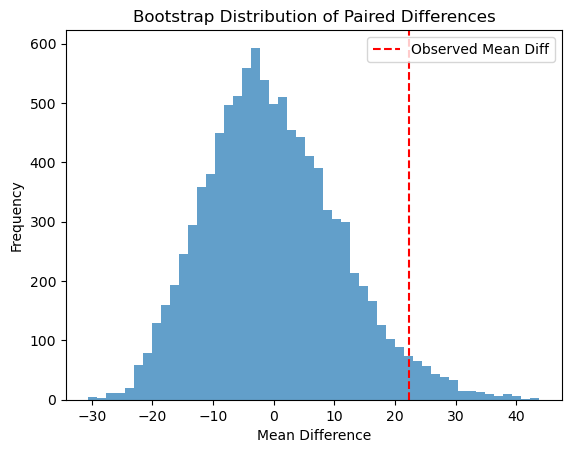

In [77]:
import numpy as np
import matplotlib.pyplot as plt

pm23 = np.array(pm23_list)
pm25 = np.array(pm25_list)

# Step 1: Calculate observed differences
differences = pm23 - pm25
obs_mean_diff = np.mean(differences)

# Step 2: Center the differences under the null hypothesis (mean=0)
centered_diff = differences - np.mean(differences)

# Step 3: Bootstrap
n_bootstraps = 10000
boot_means = []

for _ in range(n_bootstraps):
    sample = np.random.choice(centered_diff, size=len(centered_diff), replace=True)
    boot_means.append(np.mean(sample))

boot_means = np.array(boot_means)

# Step 4: Calculate p-value (right-tailed test)
p_value = np.mean(boot_means >= obs_mean_diff)

# Output results
print(f"Observed mean difference: {obs_mean_diff:.3f}")
print(f"P-value (one-sided, pm23 > pm25): {p_value:.4f}")

# Optional: Plot the bootstrap distribution
plt.hist(boot_means, bins=50, alpha=0.7)
plt.axvline(obs_mean_diff, color='red', linestyle='dashed', label='Observed Mean Diff')
plt.title('Bootstrap Distribution of Paired Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### compare 25 with 22

Wilcoxon 2025 vs 2022

In [78]:
import statsmodels.stats
from scipy import stats
# Step 4: Run the Wilcoxon signed-rank test
stat, p = stats.wilcoxon(pm25_list, pm22_list, alternative='less')

# Step 5: Print result
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('A significant decrease occurred in 2025, compared to 2022.')


stat=11.000, p=0.027
A significant decrease occurred in 2025, compared to 2022.


Bootstrap 2025 vs 2022

Observed mean difference: 26.970
P-value (one-sided, pm23 > pm25): 0.0253


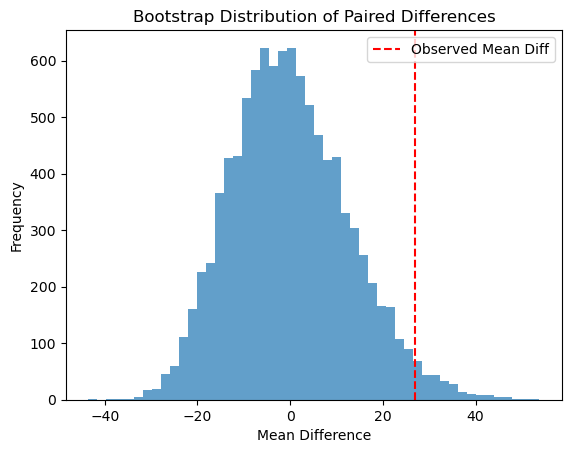

In [79]:
import numpy as np
import matplotlib.pyplot as plt

pm22 = np.array(pm22_list)
pm25 = np.array(pm25_list)

# Step 1: Calculate observed differences
differences = pm22 - pm25
obs_mean_diff = np.mean(differences)

# Step 2: Center the differences under the null hypothesis (mean=0)
centered_diff = differences - np.mean(differences)

# Step 3: Bootstrap
n_bootstraps = 10000
boot_means = []

for _ in range(n_bootstraps):
    sample = np.random.choice(centered_diff, size=len(centered_diff), replace=True)
    boot_means.append(np.mean(sample))

boot_means = np.array(boot_means)

# Step 4: Calculate p-value (right-tailed test)
p_value = np.mean(boot_means >= obs_mean_diff)

# Output results
print(f"Observed mean difference: {obs_mean_diff:.3f}")
print(f"P-value (one-sided, pm23 > pm25): {p_value:.4f}")

# Optional: Plot the bootstrap distribution
plt.hist(boot_means, bins=50, alpha=0.7)
plt.axvline(obs_mean_diff, color='red', linestyle='dashed', label='Observed Mean Diff')
plt.title('Bootstrap Distribution of Paired Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### compare 25 with 21

Wilcoxon 2025 vs 2021

In [80]:
import statsmodels.stats
from scipy import stats
# Step 4: Run the Wilcoxon signed-rank test
stat, p = stats.wilcoxon(pm25_list, pm21_list, alternative='less')

# Step 5: Print result
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('A significant decrease occurred in 2025, compared to 2021.')


stat=6.000, p=0.007
A significant decrease occurred in 2025, compared to 2021.


Bootstrap 25 with 21

Observed mean difference: 33.660
P-value (one-sided, pm21 > pm25): 0.0008


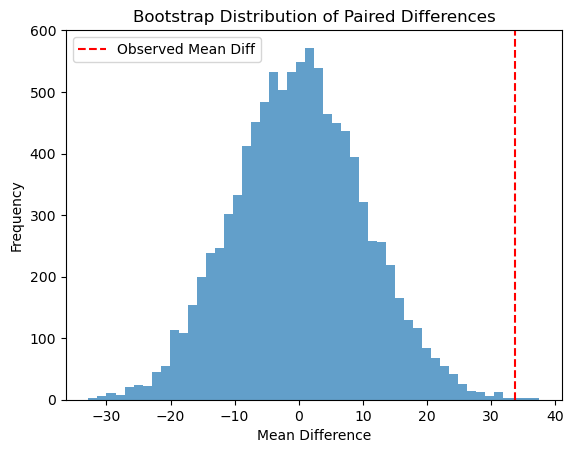

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
pm21 = np.array(pm21_list)
pm25 = np.array(pm25_list)
# Step 1: Calculate observed differences
differences = pm21 - pm25
obs_mean_diff = np.mean(differences)

# Step 2: Center the differences under the null hypothesis (mean=0)
centered_diff = differences - np.mean(differences)

# Step 3: Bootstrap
n_bootstraps = 10000
boot_means = []

for _ in range(n_bootstraps):
    sample = np.random.choice(centered_diff, size=len(centered_diff), replace=True)
    boot_means.append(np.mean(sample))

boot_means = np.array(boot_means)

# Step 4: Calculate p-value (right-tailed test)
p_value = np.mean(boot_means >= obs_mean_diff)

# Output results
print(f"Observed mean difference: {obs_mean_diff:.3f}")
print(f"P-value (one-sided, pm21 > pm25): {p_value:.4f}")

# Optional: Plot the bootstrap distribution
plt.hist(boot_means, bins=50, alpha=0.7)
plt.axvline(obs_mean_diff, color='red', linestyle='dashed', label='Observed Mean Diff')
plt.title('Bootstrap Distribution of Paired Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/tmp/ipykernel_2787989/2914692203.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True)


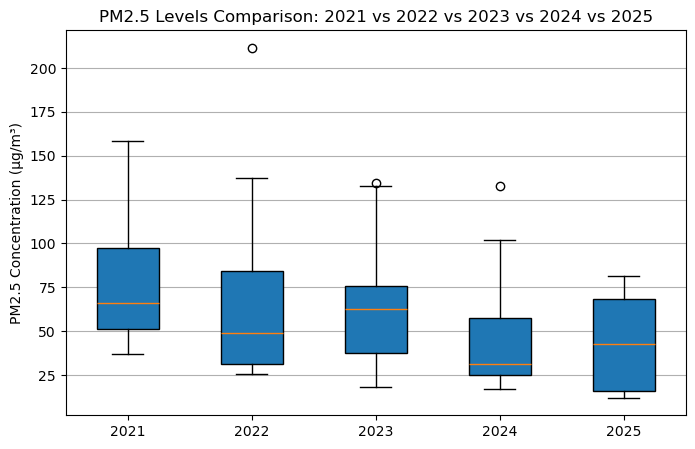

In [82]:
import matplotlib.pyplot as plt

# Prepare data for plotting
data = [pm21_list,pm22_list,pm23_list,pm24_list, pm25_list]
labels = ['2021','2022','2023','2024', '2025']

# Create boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=labels, patch_artist=True)
plt.title('PM2.5 Levels Comparison: 2021 vs 2022 vs 2023 vs 2024 vs 2025')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(axis='y')

plt.show()

Summary table of quarterly values ​​of all collected data,
for maximum values ​​of PM2.5

In [83]:

import pandas as pd
import numpy as np

data = [pm21_list,pm22_list,pm23_list,pm24_list, pm25_list]

years = [2021, 2022, 2023, 2024, 2025]

# Compute median and IQR for each year
summary = []
for year_data in data:
    year_data_clean = [x for x in year_data if not np.isnan(x)]
    median = np.median(year_data_clean)
    q1 = np.percentile(year_data_clean, 25)
    q3 = np.percentile(year_data_clean, 75)
    summary.append([median, f"{q1:.2f}–{q3:.2f}"])

# Create DataFrame
df_summary = pd.DataFrame(summary, columns=["Median PM2.5 (µg/m³)", "IQR (µg/m³)"], index=years)
df_summary.reset_index(inplace=True)
df_summary.rename(columns={"index": "Year"}, inplace=True)

from IPython.display import display
display(df_summary)

,Year,Median PM2.5 (µg/m³),IQR (µg/m³)
0,2021,66.30,51.10–97.65
1,2022,48.80,31.25–84.50
2,2023,62.79,37.45–75.91
3,2024,31.50,24.70–57.23
4,2025,42.48,15.95–68.55


HeatMap for all-year comparison

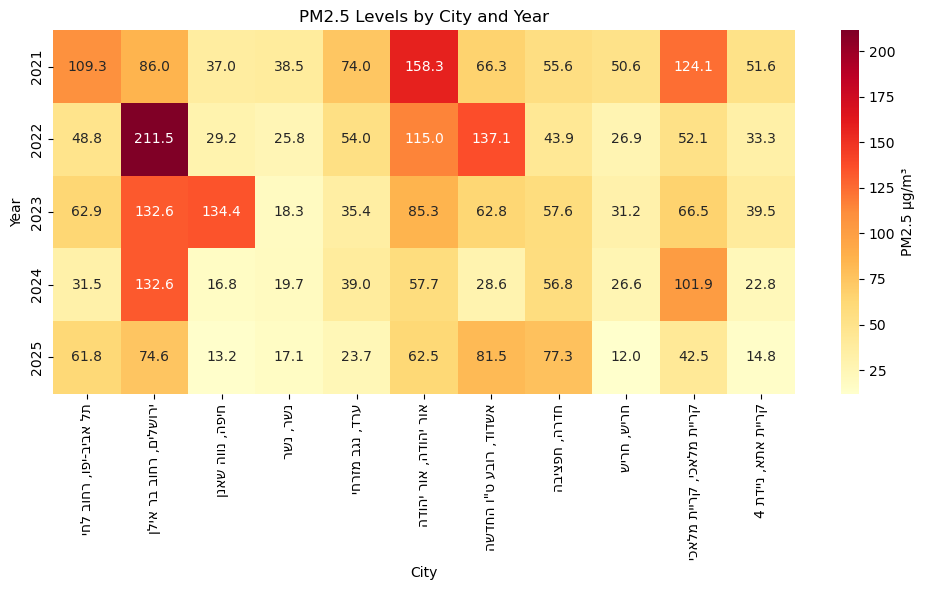

In [84]:
import seaborn as sns
import pandas as pd

cities = df_max_2021.columns.tolist()
cities = [city[::-1] for city in cities]
# Prepare DataFrame
df = pd.DataFrame(data, index=years, columns=cities)

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'PM2.5 µg/m³'})
plt.title("PM2.5 Levels by City and Year")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

diffrence in 2021 between holiday eve to regular days befor and after

In [94]:
import pandas as pd
import numpy as np

# Load the file
df = pd.read_excel("../data/WeeklyReports/WeeklyReport2021.xlsx")
df = df[:-11]
# df = df.drop(columns=["תל אביב-יפו, רחוב יפת"])
df['תאריך ושעה'] = pd.to_datetime(df['תאריך ושעה'], errors='coerce')

# Extract only the date part for grouping
df['תאריך ושעה'] = df['תאריך ושעה'].dt.date
# Group by date and get the maximum value per city for each day
df = df.rename(columns={"תאריך ושעה": "Date"})

# Convert all columns (except the first one, like date) to numeric
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

df = df.groupby('Date').agg('max').reset_index()
df.head(2)


/tmp/ipykernel_2787989/4085581807.py:8: UserWarning: Parsing dates in %H:%M %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['תאריך ושעה'] = pd.to_datetime(df['תאריך ושעה'], errors='coerce')


,Date,"ירושלים, רחוב בר אילן","בני ברק, כביש 4","חיפה, נווה שאנן","נשר, נשר","ערד, נגב מזרחי","אשקלון, שמשון","תל אביב-יפו, רחוב יפת","מועצה אזורית חוף הכרמל, כפר הנוער שפיה","אור יהודה, אור יהודה","אשדוד, רובע ט""ו החדשה","קטורה, קטורה","חדרה, חפציבה","חריש, חריש"
0,2021-04-24,34.4,35.4,26.8,31.8,35.0,28.28,NaN,32.9,27.6,23.15,30.2,24.0,25.2
1,2021-04-25,39.3,32.9,22.9,28.4,33.0,34.24,NaN,37.27,36.0,19.58,34.1,28.73,28.3


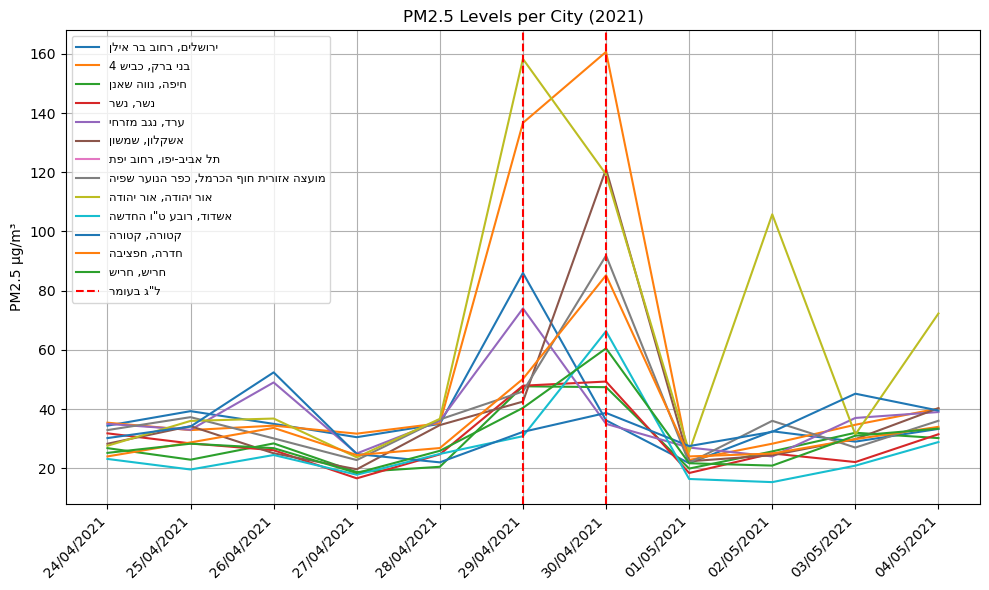

In [89]:

# Plot
plt.figure(figsize=(10, 6))
for city in df.columns[1:]:
    plt.plot(df['Date'], df[city], label=city[::-1])  # Reverse Hebrew for display

# Format x-axis to show every day
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.xticks(df['Date'], df['Date'].dt.strftime('%d/%m/%Y'), rotation=45, ha='right')

# Vertical line for Lag BaOmer- 29/04 night is actually 30/04
lag_baomer = pd.to_datetime("2021-04-30")
lag_baomer_label= 'ל"ג בעומר'
lag_baomer_label = lag_baomer_label[::-1]
plt.axvline(lag_baomer, color='red', linestyle='--', linewidth=1.5, label=lag_baomer_label)

lag_baomer = pd.to_datetime("2021-04-29")
plt.axvline(lag_baomer, color='red', linestyle='--', linewidth=1.5)

# plt.xlabel('Date')
plt.ylabel('PM2.5 µg/m³')
plt.title('PM2.5 Levels per City (2021)')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

## MAP 2021- MAP 2025

In [95]:
!pip install folium requests

import folium
from folium.plugins import DualMap
from branca.element import Template, MacroElement
import requests

# -----------------------------
# 1. PM2.5 values
# -----------------------------
pm25_dict = {
    "תל אביב-יפו, רחוב לחי": 61.8,
    "ירושלים, רחוב בר אילן": 74.6,
    "חיפה, נווה שאנן": 13.2,
    "נשר, נשר": 17.1,
    "ערד, נגב מזרחי": 23.7,
    "אור יהודה, אור יהודה": 62.5,
    "אשדוד, רובע ט\"ו החדשה": 81.52,
    "חדרה, חפציבה": 77.28,
    "חריש, חריש": 12,
    "קריית מלאכי, קריית מלאכי": 42.48,
    "קריית אתא, ניידת 4": 14.8
}

pm21_dict = {
    "תל אביב-יפו, רחוב לחי": 109.3,
    "ירושלים, רחוב בר אילן": 86,
    "חיפה, נווה שאנן": 37,
    "נשר, נשר": 38.5,
    "ערד, נגב מזרחי": 74,
    "אור יהודה, אור יהודה": 158.3,
    "אשדוד, רובע ט\"ו החדשה": 66.3,
    "חדרה, חפציבה": 55.56,
    "חריש, חריש": 50.6,
    "קריית מלאכי, קריית מלאכי": 124.08,
    "קריית אתא, ניידת 4": 51.6
}

# -----------------------------
# 2. Coordinates
# -----------------------------
city_coords = {
    "תל אביב-יפו, רחוב לחי": [32.0504, 34.7663],
    "ירושלים, רחוב בר אילן": [31.7977, 35.2137],
    "חיפה, נווה שאנן": [32.7768, 35.0202],
    "נשר, נשר": [32.7684, 35.0422],
    "ערד, נגב מזרחי": [31.2589, 35.2126],
    "אור יהודה, אור יהודה": [32.0282, 34.8543],
    "אשדוד, רובע ט\"ו החדשה": [31.7974, 34.6508],
    "חדרה, חפציבה": [32.4430, 34.9206],
    "חריש, חריש": [32.5030, 35.0507],
    "קריית מלאכי, קריית מלאכי": [31.7304, 34.7472],
    "קריית אתא, ניידת 4": [32.8075, 35.1080]
}

# -----------------------------
# 3. Color function
# -----------------------------
def get_color(pm25):
    if pm25 <= 35:
        return 'green'
    elif pm25 <= 65:
        return 'orange'
    elif pm25 <= 95:
        return 'red'
    else:
        return 'darkred'

# -----------------------------
# 4. Create synchronized dual map
# -----------------------------
dual_map = DualMap(location=[31.8, 35.0], zoom_start=8)

# --- Add 2021 data (left map)
for city, value in pm21_dict.items():
    coords = city_coords.get(city)
    if coords:
        folium.CircleMarker(
            location=coords,
            radius=8,
            color=get_color(value),
            fill=True,
            fill_color=get_color(value),
            fill_opacity=0.8,
            popup=f"{city}<br><b>Max PM2.5 (2021):</b> {value:.1f}"
        ).add_to(dual_map.m1)

# --- Add 2025 data (right map)
for city, value in pm25_dict.items():
    coords = city_coords.get(city)
    if coords:
        folium.CircleMarker(
            location=coords,
            radius=8,
            color=get_color(value),
            fill=True,
            fill_color=get_color(value),
            fill_opacity=0.8,
            popup=f"{city}<br><b>Max PM2.5 (2025):</b> {value:.1f}"
        ).add_to(dual_map.m2)

# -----------------------------
# 5. Add titles above each map pane
# -----------------------------
title_html = """
{% macro html(this, kwargs) %}

<style>
    .map-title-left {
        position: absolute;
        top: 10px;
        left: 25%;
        z-index: 9999;
        background-color: rgba(255,255,255,0.8);
        padding: 6px 12px;
        font-size: 20px;
        font-weight: bold;
        border-radius: 6px;
    }
    .map-title-right {
        position: absolute;
        top: 10px;
        right: 25%;
        z-index: 9999;
        background-color: rgba(255,255,255,0.8);
        padding: 6px 12px;
        font-size: 20px;
        font-weight: bold;
        border-radius: 6px;
    }
</style>

<div class="map-title-left">PM2.5 - 2021</div>
<div class="map-title-right">PM2.5 - 2025</div>

{% endmacro %}
"""
title_element = MacroElement()
title_element._template = Template(title_html)
dual_map.get_root().add_child(title_element)

# -----------------------------
# 6. Save to file
# -----------------------------
dual_map.save("../visualizations/PM25_Comparison_2021_vs_2025.html")

print("✅ Map saved as PM25_Comparison_2021_vs_2025.html")

✅ Map saved as PM25_Comparison_2021_vs_2025.html
